# Start evalutaion for CPU Indexs fo Textbooks

## Exploratory analisis

In [1]:
import pandas as pd

# Assuming your data is in a CSV file named 'data.csv'
data = pd.read_csv('/home/baptvit/Documents/github/banco-de-dados-massivos/milvus/milvus-python/milvus_python/results/textbook/evaluation/index_flat__cosine_similarity.csv')

In [2]:
data.head()

,Unnamed: 0,timestamp,index_name,memory_load_duration,query_id,search_duration,top1,top5,top10,distance,query_cost
0,0,2024-06-22 18:23:05.900058,index_flat__cosine_similarity,7.695636,0,0.346888,True,True,True,0.949925,0
1,1,2024-06-22 18:23:06.249425,index_flat__cosine_similarity,7.695636,2,0.403312,True,True,True,0.988072,0
2,2,2024-06-22 18:23:06.656241,index_flat__cosine_similarity,7.695636,3,0.373893,True,True,True,0.976285,0
3,3,2024-06-22 18:23:07.035353,index_flat__cosine_similarity,7.695636,4,0.394859,True,True,True,0.976112,0
4,4,2024-06-22 18:23:07.433091,index_flat__cosine_similarity,7.695636,5,0.398441,True,True,True,0.989901,0


In [3]:
def calculate_accuracy(data):
  accuracy = (data['top1'] == True).mean() * 100  # Calculate percentage
  return accuracy

In [4]:
calculate_accuracy(data)

89.1

In [5]:
# Define time bins (adjust as needed)
time_bins = [0, 0.4, 0.8, 1]

# Calculate average accuracy for each time bin
accuracy_by_time = []
for i in range(len(time_bins) - 1):
  subset = data[(data['search_duration'] >= time_bins[i]) & (data['search_duration'] < time_bins[i+1])]
  accuracy_by_time.append(calculate_accuracy(subset))

# Print results
for i, time_range in enumerate(zip(time_bins[:-1], time_bins[1:])):
  print(f"Average Accuracy for search duration between {time_range[0]} and {time_range[1]} seconds: {accuracy_by_time[i]:.2f}%")


Average Accuracy for search duration between 0 and 0.4 seconds: 90.05%
Average Accuracy for search duration between 0.4 and 0.8 seconds: 87.95%
Average Accuracy for search duration between 0.8 and 1 seconds: 50.00%


# Analise de tempo de retorno: by Index Name

In [6]:
import glob
import os

path = "/home/baptvit/Documents/github/banco-de-dados-massivos/milvus/milvus-python/milvus_python/results/textbook/evaluation/"

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

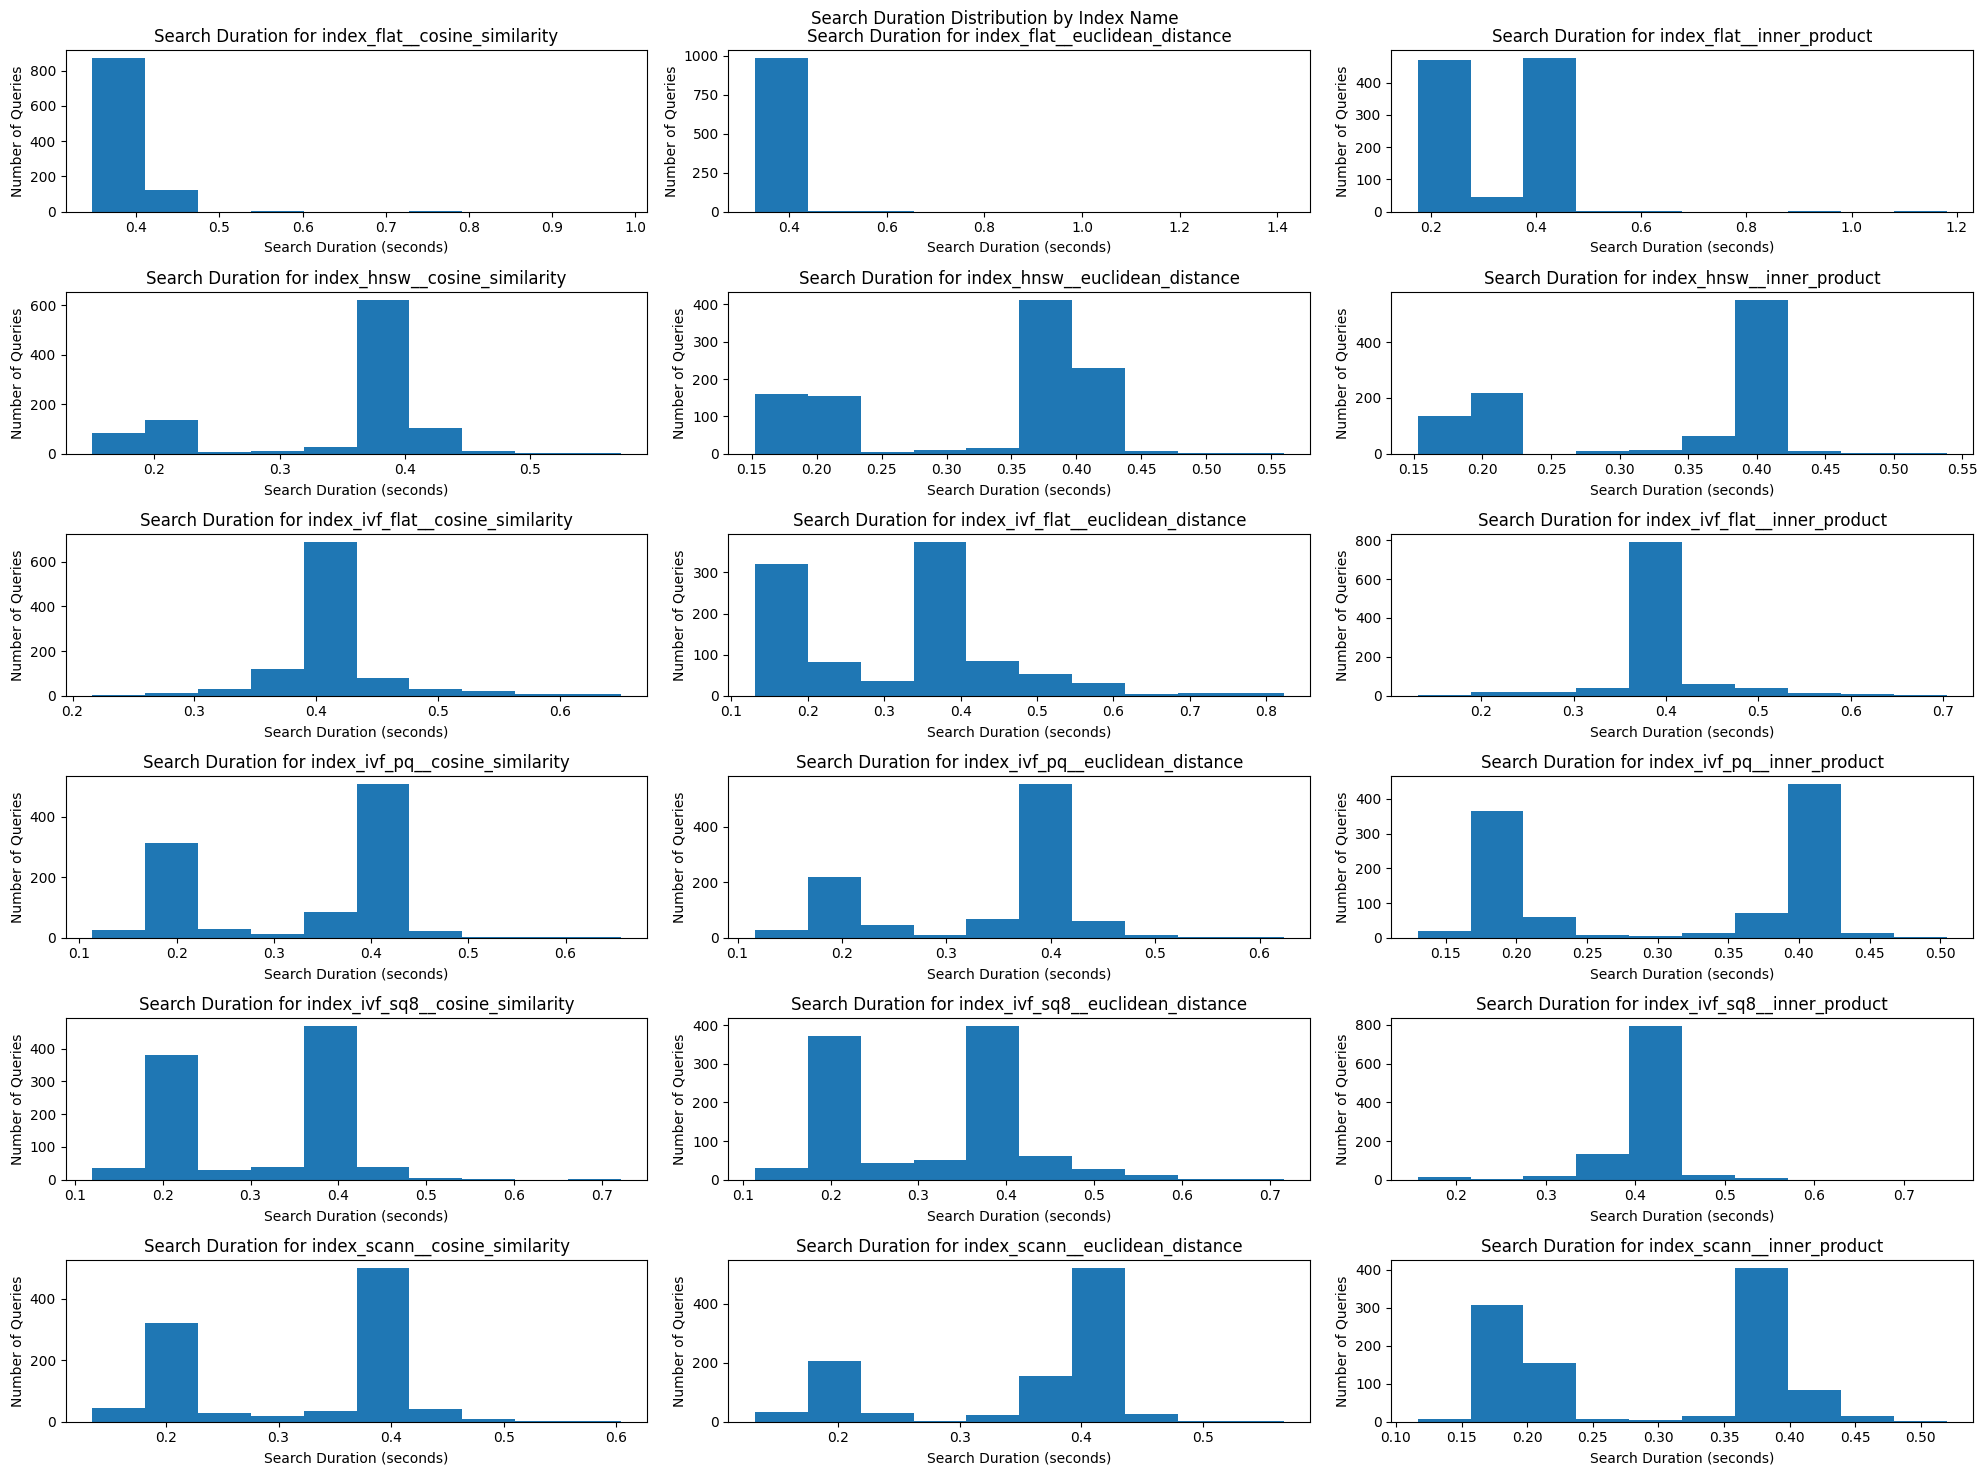

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data into a DataFrame
data = df  # Assuming 'df' is your DataFrame

# Group data by index_name
grouped_data = data.groupby("index_name")

# Configure the number of rows and columns for subplots (adjust as needed)
rows, cols = 6, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

# Analyze search duration and plot for each index
for name, group in grouped_data:
  # Access the current subplot using ax_count
  ax = axes.flat[ax_count]

  # Plot the distribution of search duration
  ax.hist(group["search_duration"])
  ax.set_xlabel("Search Duration (seconds)")
  ax.set_ylabel("Number of Queries")
  ax.set_title(f"Search Duration for {name}")

  # Increase counter for next subplot
  ax_count += 1

# Adjust layout (optional)
fig.suptitle("Search Duration Distribution by Index Name")
plt.tight_layout()

# Show the final plot
plt.show()


In [8]:
import pandas as pd

# Assuming 'df' is your existing DataFrame containing search data
# If not, replace 'df' with the actual CSV reading code

# Group data by index_name
grouped_data = df.groupby("index_name")

# Create an empty DataFrame to store statistics
time_stats_df = pd.DataFrame(columns=["Index Name", "Mean Search Duration", "Median Search Duration", "Standard Deviation", "25th Percentile", "50th Percentile (Median)", "75th Percentile", "90th Percentile"])

# Analyze search duration for each index and populate the DataFrame
for name, group in grouped_data:
  # Calculate statistics
  mean_duration = group['search_duration'].mean()
  median_duration = group['search_duration'].median()
  std_dev = group['search_duration'].std()
  percentiles = group['search_duration'].quantile([0.25, 0.5, 0.75, 0.9])

  # Add a new row to the DataFrame with statistics for this index_name
  time_stats_df = time_stats_df._append({
      "Index Name": name,
      "Mean Search Duration": mean_duration,
      "Median Search Duration": median_duration,
      "Standard Deviation": std_dev,
      "25th Percentile": percentiles[0.25],
      "50th Percentile (Median)": percentiles[0.5],
      "75th Percentile": percentiles[0.75],
      "90th Percentile": percentiles[0.9]
  }, ignore_index=True)

/tmp/ipykernel_254693/1434807934.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time_stats_df = time_stats_df._append({


## Ordenado pela media

In [9]:
time_stats_df.sort_values(by=['Mean Search Duration']).reset_index(drop = True)

,Index Name,Mean Search Duration,Median Search Duration,Standard Deviation,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile
0,index_scann__inner_product,0.300852,0.362957,0.101466,0.196556,0.362957,0.396431,0.398591
1,index_ivf_pq__inner_product,0.305821,0.381263,0.100251,0.196680,0.381263,0.396516,0.398590
2,index_flat__inner_product,0.306326,0.373197,0.107861,0.200914,0.373197,0.397392,0.409389
3,index_ivf_sq8__cosine_similarity,0.309850,0.372659,0.102426,0.197054,0.372659,0.396529,0.399818
4,index_ivf_sq8__euclidean_distance,0.313430,0.357690,0.108607,0.196702,0.357690,0.396767,0.420555
5,index_scann__cosine_similarity,0.316998,0.388280,0.099965,0.197119,0.388280,0.396610,0.401838
6,index_ivf_pq__cosine_similarity,0.322327,0.391575,0.100059,0.197254,0.391575,0.396730,0.408170
7,index_hnsw__inner_product,0.322359,0.387506,0.096572,0.197976,0.387506,0.396689,0.403296
8,index_hnsw__euclidean_distance,0.328290,0.386140,0.094536,0.199506,0.386140,0.396307,0.403418
9,index_ivf_flat__euclidean_distance,0.332692,0.385180,0.126363,0.197231,0.385180,0.397906,0.478804


## Ordenado pelo Desvio Padrao

In [11]:
time_stats_df.sort_values(by=['Standard Deviation'])

,Index Name,Mean Search Duration,Median Search Duration,Standard Deviation,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile
0,index_flat__cosine_similarity,0.399849,0.397517,0.033127,0.390695,0.397517,0.405452,0.412058
14,index_ivf_sq8__inner_product,0.394668,0.396442,0.039810,0.395435,0.396442,0.397562,0.411906
6,index_ivf_flat__cosine_similarity,0.405726,0.396906,0.046411,0.394887,0.396906,0.401660,0.456084
1,index_flat__euclidean_distance,0.401441,0.398461,0.052050,0.389224,0.398461,0.407871,0.414530
8,index_ivf_flat__inner_product,0.398564,0.396582,0.055451,0.394995,0.396582,0.398232,0.440573
3,index_hnsw__cosine_similarity,0.347422,0.388879,0.084629,0.348814,0.388879,0.397132,0.405049
16,index_scann__euclidean_distance,0.342716,0.395154,0.091429,0.227965,0.395154,0.397686,0.412605
10,index_ivf_pq__euclidean_distance,0.337790,0.394352,0.094073,0.218682,0.394352,0.397144,0.413219
4,index_hnsw__euclidean_distance,0.328290,0.386140,0.094536,0.199506,0.386140,0.396307,0.403418
5,index_hnsw__inner_product,0.322359,0.387506,0.096572,0.197976,0.387506,0.396689,0.403296


<Axes: title={'center': 'search_duration'}, xlabel='index_name'>

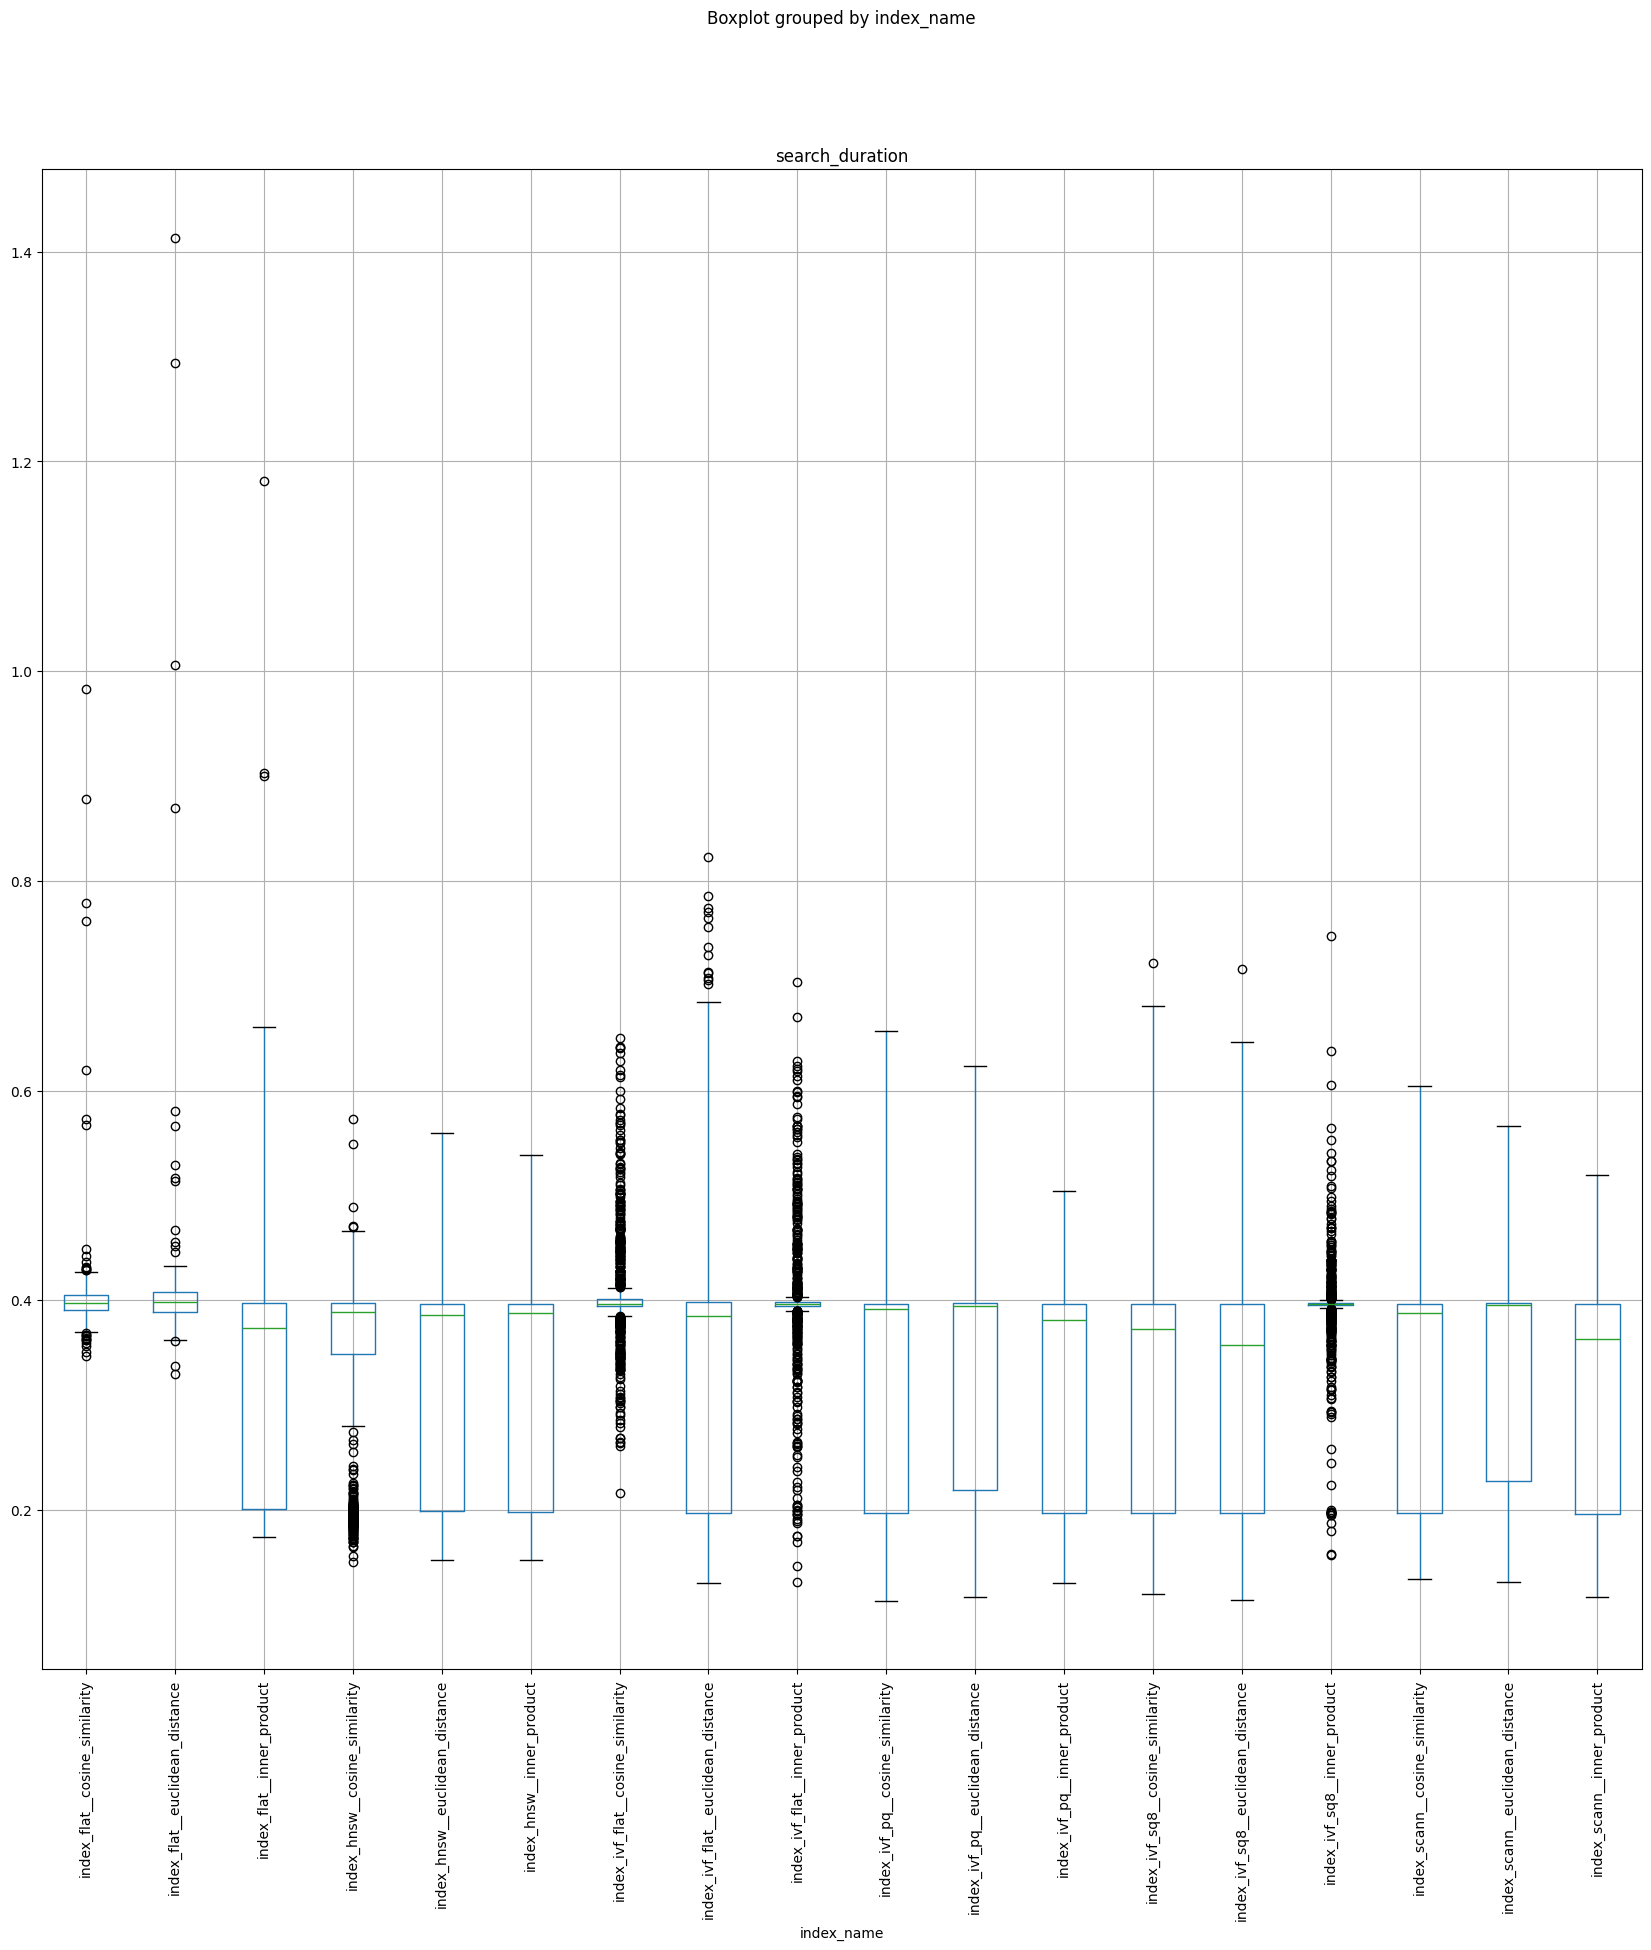

In [13]:
df.boxplot(column=['search_duration'], by='index_name', figsize=(20, 20), rot=90, layout=(1, 1))

## Media e desvio padrao

In [15]:
stats_df.sort_values(by=['Mean Search Duration', 'Standard Deviation'])

NameError: name 'stats_df' is not defined

# Analise de accuraria por Index Name

In [16]:
import pandas as pd

# Assuming 'df' is your existing DataFrame containing search data
# If not, replace 'df' with the actual CSV reading code

# Group data by index_name
grouped_data = df.groupby("index_name")

# Create an empty dictionary to store success rates

# Create an empty DataFrame to store statistics
acc_stats_df = pd.DataFrame(columns=["Index Name", "Top 1 Success", "Top 5 Success", "Top 10 Success"])

# Analyze retrieval success rates for each index_name
for name, group in grouped_data:
  # Calculate success rates for Top 1, 5, and 10 retrievals
  top1_success = (group["top1"] == True).sum() / len(group) * 100
  top5_success = (group["top5"] == True).sum() / len(group) * 100
  top10_success = (group["top10"] == True).sum() / len(group) * 100

  # Store success rates in the dictionary
  acc_stats_df = acc_stats_df._append({
      "Index Name": name,
      "Top 1 Success": top1_success,
      "Top 5 Success": top5_success,
      "Top 10 Success": top10_success,
  }, ignore_index=True)

/tmp/ipykernel_254693/2923012851.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc_stats_df = acc_stats_df._append({


In [17]:
acc_stats_df.sort_values(by=['Top 1 Success'], ascending=False).reset_index(drop = True)

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success
0,index_hnsw__euclidean_distance,89.3,94.1,94.5
1,index_flat__euclidean_distance,89.3,94.1,94.5
2,index_ivf_flat__euclidean_distance,89.2,94.0,94.4
3,index_ivf_sq8__euclidean_distance,89.2,93.9,94.3
4,index_flat__cosine_similarity,89.1,93.8,94.5
5,index_hnsw__cosine_similarity,89.1,93.8,94.5
6,index_ivf_flat__cosine_similarity,89.0,93.6,94.2
7,index_ivf_sq8__cosine_similarity,88.8,93.4,94.3
8,index_scann__euclidean_distance,88.0,92.3,92.6
9,index_scann__cosine_similarity,87.0,90.6,90.8


In [18]:
acc_stats_df.sort_values(by=['Top 5 Success'], ascending=False).reset_index(drop = True)

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success
0,index_hnsw__euclidean_distance,89.3,94.1,94.5
1,index_flat__euclidean_distance,89.3,94.1,94.5
2,index_ivf_flat__euclidean_distance,89.2,94.0,94.4
3,index_ivf_sq8__euclidean_distance,89.2,93.9,94.3
4,index_flat__cosine_similarity,89.1,93.8,94.5
5,index_hnsw__cosine_similarity,89.1,93.8,94.5
6,index_ivf_flat__cosine_similarity,89.0,93.6,94.2
7,index_ivf_sq8__cosine_similarity,88.8,93.4,94.3
8,index_scann__euclidean_distance,88.0,92.3,92.6
9,index_scann__cosine_similarity,87.0,90.6,90.8


In [19]:
acc_stats_df.sort_values(by=['Top 10 Success'], ascending=False).reset_index(drop = True)

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success
0,index_flat__cosine_similarity,89.1,93.8,94.5
1,index_hnsw__cosine_similarity,89.1,93.8,94.5
2,index_hnsw__euclidean_distance,89.3,94.1,94.5
3,index_flat__euclidean_distance,89.3,94.1,94.5
4,index_ivf_flat__euclidean_distance,89.2,94.0,94.4
5,index_ivf_sq8__cosine_similarity,88.8,93.4,94.3
6,index_ivf_sq8__euclidean_distance,89.2,93.9,94.3
7,index_ivf_flat__cosine_similarity,89.0,93.6,94.2
8,index_scann__euclidean_distance,88.0,92.3,92.6
9,index_scann__cosine_similarity,87.0,90.6,90.8


/tmp/ipykernel_254693/2475269002.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc_stats_df = acc_stats_df._append({


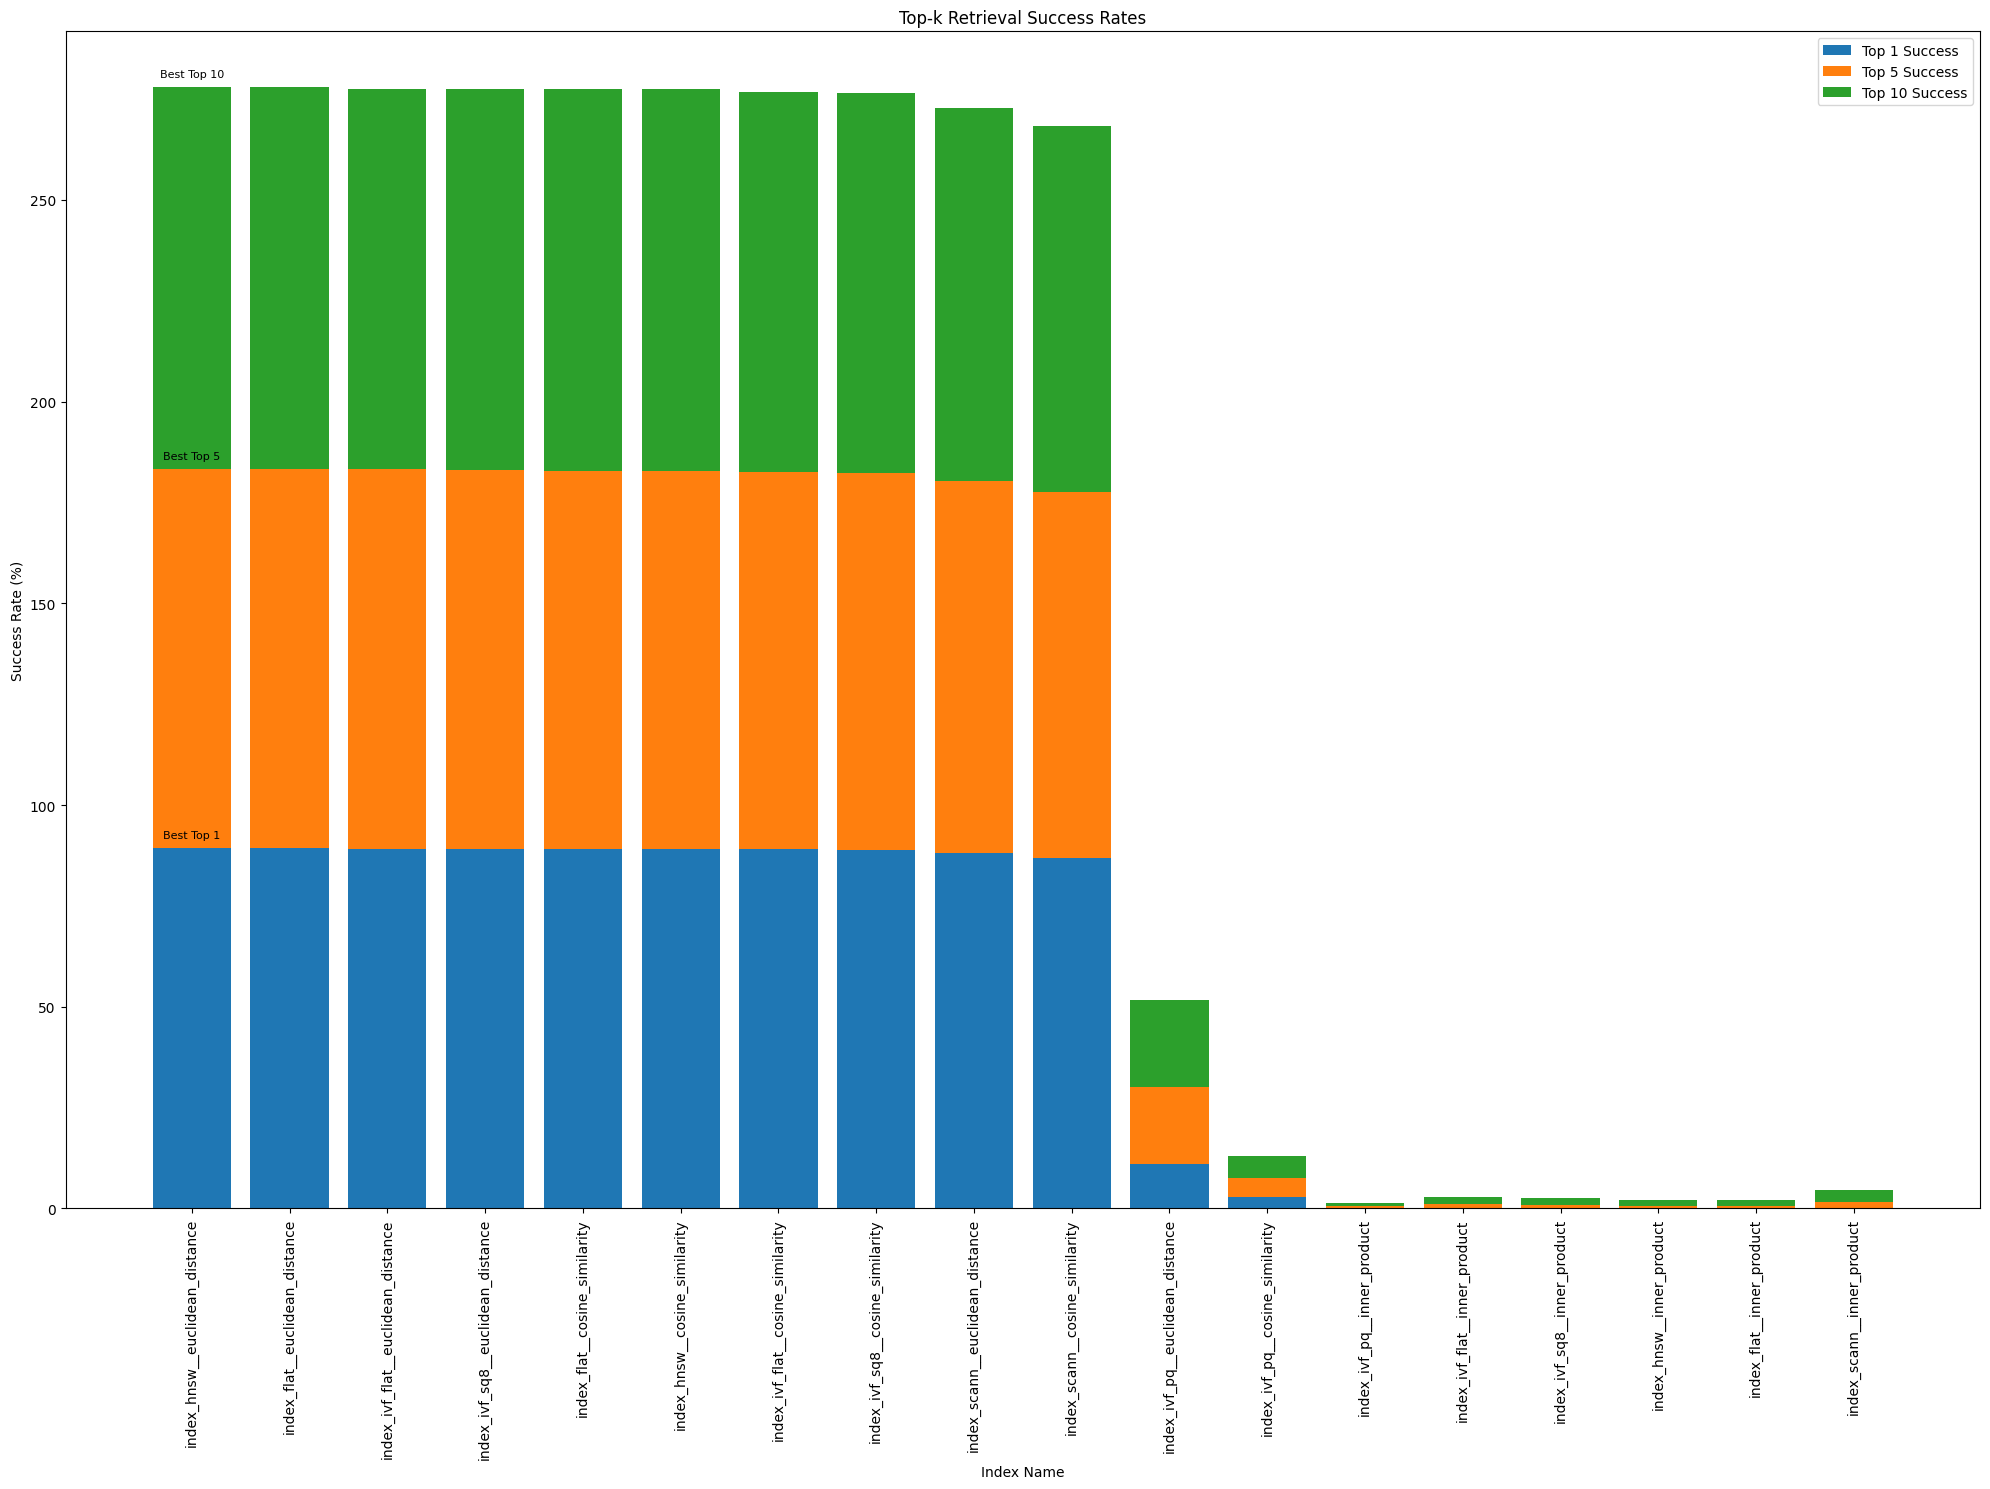

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your existing DataFrame containing search data
# If not, replace 'df' with the actual CSV reading code

# Group data by index_name
grouped_data = df.groupby("index_name")

# Create an empty DataFrame to store success rates
acc_stats_df = pd.DataFrame(columns=["Index Name", "Top 1 Success", "Top 5 Success", "Top 10 Success"])

# Analyze retrieval success rates for each index_name
for name, group in grouped_data:
  # Calculate success rates for Top 1, 5, and 10 retrievals
  top1_success = (group["top1"] == True).sum() / len(group) * 100
  top5_success = (group["top5"] == True).sum() / len(group) * 100
  top10_success = (group["top10"] == True).sum() / len(group) * 100

  # Store success rates in the DataFrame
  acc_stats_df = acc_stats_df._append({
      "Index Name": name,
      "Top 1 Success": top1_success,
      "Top 5 Success": top5_success,
      "Top 10 Success": top10_success
  }, ignore_index=True)

acc_stats_df = acc_stats_df.sort_values(by=['Top 1 Success'], ascending=False).reset_index(drop = True)

# Define a function to identify the best index based on a specific k value (Top 1, 5, or 10)
def get_best_index(k):
  # Sort DataFrame by the chosen success rate column in descending order
  sorted_df = acc_stats_df.sort_values(by=f"Top {k} Success", ascending=False)
  # Return the index_name with the highest success rate
  return sorted_df.iloc[0]["Index Name"]

# Find the best index names for Top 1, 5, and 10
best_top1_index = get_best_index(1)
best_top5_index = get_best_index(5)
best_top10_index = get_best_index(10)

# Create a bar chart to visualize success rates
fig, ax = plt.subplots(figsize=(20, 15))
x = acc_stats_df["Index Name"]
y1 = acc_stats_df["Top 1 Success"]
y2 = acc_stats_df["Top 5 Success"]
y3 = acc_stats_df["Top 10 Success"]

# Plot bars for each success rate metric
ax.bar(x, y1, label='Top 1 Success')
ax.bar(x, y2, label='Top 5 Success', bottom=y1)
ax.bar(x, y3, label='Top 10 Success', bottom=[y1[i] + y2[i] for i in range(len(y1))])

# Set labels and title
ax.set_xlabel("Index Name")
ax.set_ylabel("Success Rate (%)")
ax.set_title("Top-k Retrieval Success Rates")

# Add legend and rotate x-axis labels for better readability
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate the best performing indexes for Top 1, 5, and 10
for i, row in acc_stats_df.iterrows():
  index_name = row["Index Name"]
  if index_name == best_top1_index:
    plt.text(i, y1[i] + 2, "Best Top 1", ha='center', va='bottom', fontsize=8)
  if index_name == best_top5_index:
    plt.text(i, y1[i] + y2[i] + 2, "Best Top 5", ha='center', va='bottom', fontsize=8)
  if index_name == best_top10_index:
    plt.text(i, y1[i] + y2[i] + y3[i] + 2, "Best Top 10", ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


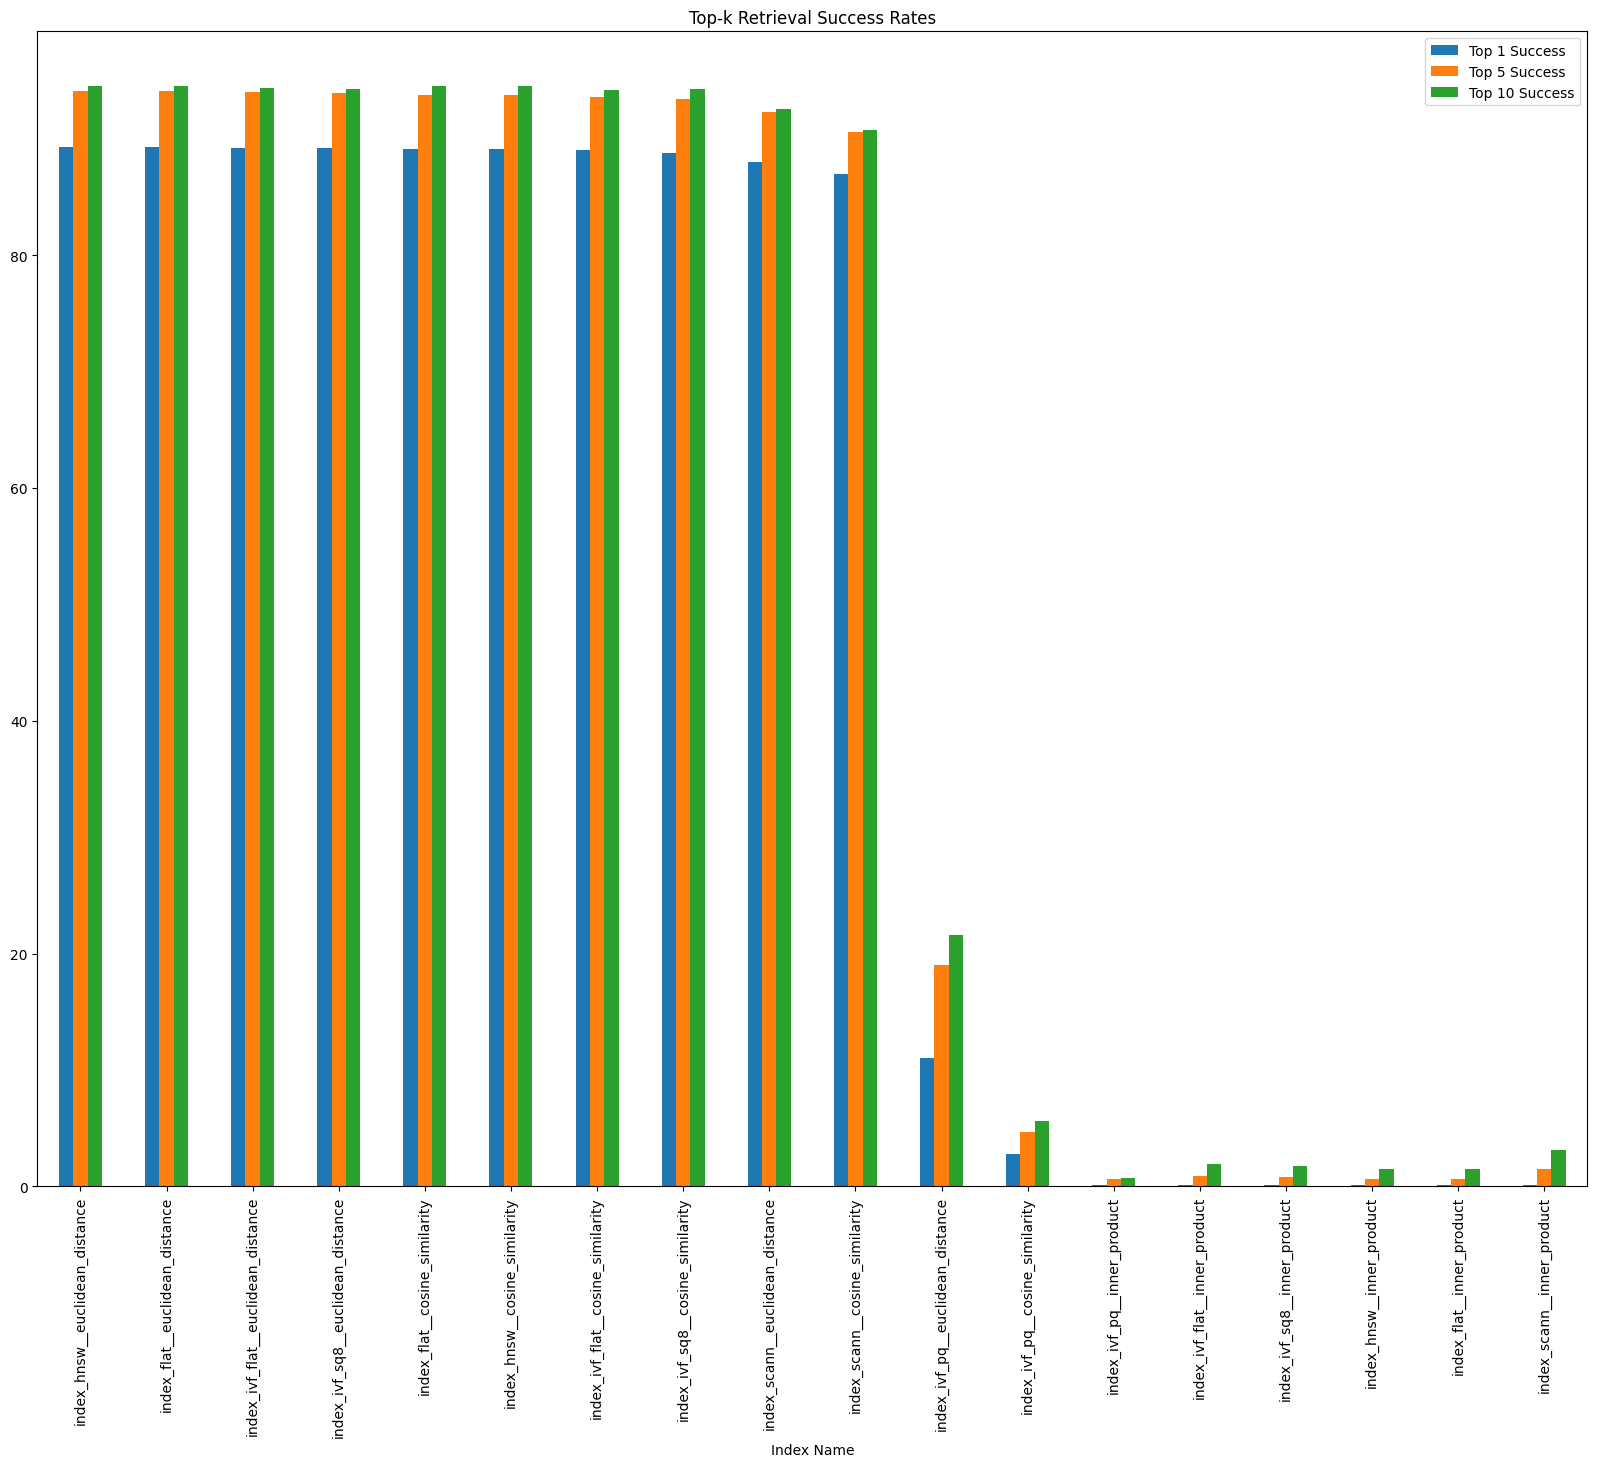

In [22]:
ax = acc_stats_df.plot.bar(x="Index Name", rot=90, figsize=(20, 15), title="Top-k Retrieval Success Rates")

# Accuray vs Tempo

In [23]:
path = "/home/baptvit/Documents/github/banco-de-dados-massivos/milvus/milvus-python/milvus_python/results/textbook/setup"

all_files = glob.glob(os.path.join(path, "*.csv"))

setup = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [24]:
setup

,Unnamed: 0,timestamp,index_name,load_datafreme_duration_s,build_index_duration_s
0,0,2024-06-22 19:29:09.887671,index_ivf_sq8__cosine_similarity,119.064541,114.553523
1,0,2024-06-22 20:49:28.176608,index_scann__euclidean_distance,131.656591,207.212922
2,0,2024-06-22 19:06:02.886476,index_ivf_sq8__euclidean_distance,119.729054,139.954447
3,0,2024-06-22 18:53:57.460763,index_ivf_flat__cosine_similarity,120.212934,123.272619
4,0,2024-06-22 18:03:14.100190,index_flat__euclidean_distance,119.042264,0.507756
5,0,2024-06-22 18:41:01.636206,index_ivf_flat__inner_product,119.584989,175.080666
6,0,2024-06-22 19:16:31.961267,index_ivf_sq8__inner_product,119.227452,164.837673
7,0,2024-06-22 18:12:42.357146,index_flat__inner_product,119.500907,0.508233
8,0,2024-06-22 18:20:37.377839,index_flat__cosine_similarity,119.359376,0.506066
9,0,2024-06-22 18:30:07.875726,index_ivf_flat__euclidean_distance,120.550513,141.940749


In [25]:
result = acc_stats_df.set_index('Index Name').join(time_stats_df.set_index('Index Name')).join(setup.set_index('index_name'))

In [26]:
result

,Top 1 Success,Top 5 Success,Top 10 Success,Mean Search Duration,Median Search Duration,Standard Deviation,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile,Unnamed: 0,timestamp,load_datafreme_duration_s,build_index_duration_s
Index Name,,,,,,,,,,,,,,
index_hnsw__euclidean_distance,89.3,94.1,94.5,0.328290,0.386140,0.094536,0.199506,0.386140,0.396307,0.403418,0,2024-06-22 20:13:12.031280,120.788286,167.572067
index_flat__euclidean_distance,89.3,94.1,94.5,0.401441,0.398461,0.052050,0.389224,0.398461,0.407871,0.414530,0,2024-06-22 18:03:14.100190,119.042264,0.507756
index_ivf_flat__euclidean_distance,89.2,94.0,94.4,0.332692,0.385180,0.126363,0.197231,0.385180,0.397906,0.478804,0,2024-06-22 18:30:07.875726,120.550513,141.940749
index_ivf_sq8__euclidean_distance,89.2,93.9,94.3,0.313430,0.357690,0.108607,0.196702,0.357690,0.396767,0.420555,0,2024-06-22 19:06:02.886476,119.729054,139.954447
index_flat__cosine_similarity,89.1,93.8,94.5,0.399849,0.397517,0.033127,0.390695,0.397517,0.405452,0.412058,0,2024-06-22 18:20:37.377839,119.359376,0.506066
index_hnsw__cosine_similarity,89.1,93.8,94.5,0.347422,0.388879,0.084629,0.348814,0.388879,0.397132,0.405049,0,2024-06-22 20:37:34.581100,123.261992,165.167708
index_ivf_flat__cosine_similarity,89.0,93.6,94.2,0.405726,0.396906,0.046411,0.394887,0.396906,0.401660,0.456084,0,2024-06-22 18:53:57.460763,120.212934,123.272619
index_ivf_sq8__cosine_similarity,88.8,93.4,94.3,0.309850,0.372659,0.102426,0.197054,0.372659,0.396529,0.399818,0,2024-06-22 19:29:09.887671,119.064541,114.553523
index_scann__euclidean_distance,88.0,92.3,92.6,0.342716,0.395154,0.091429,0.227965,0.395154,0.397686,0.412605,0,2024-06-22 20:49:28.176608,131.656591,207.212922


In [27]:
result.to_csv("textbook_stats.csv")

In [28]:
time_analises_1 = result[['Top 1 Success', 'Mean Search Duration']].reset_index()


/tmp/ipykernel_254693/1543572545.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])


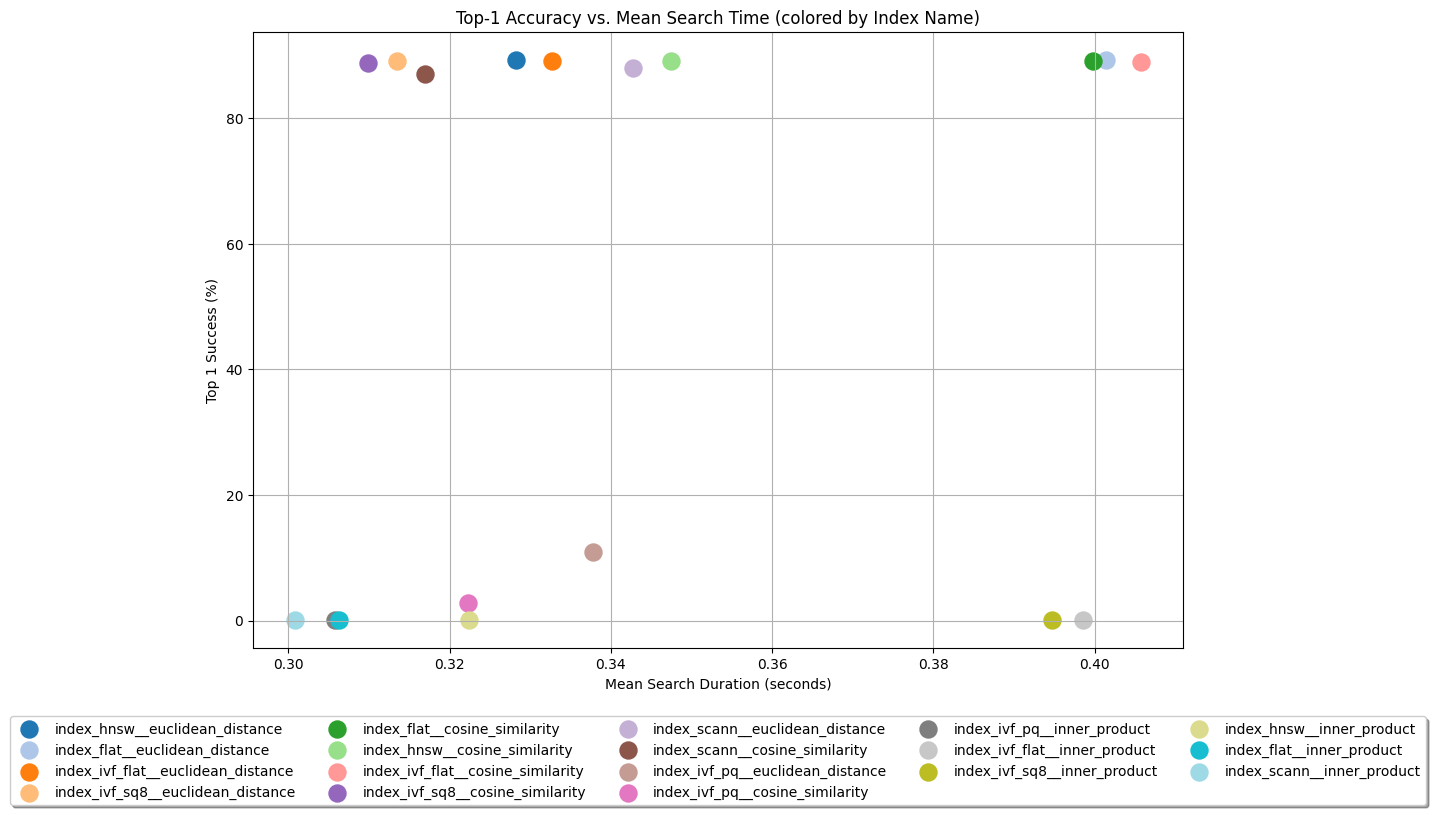

In [29]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = time_analises_1
mean_duration = df["Mean Search Duration"]
top1_accuracy = df["Top 1 Success"]

# Create the scatter plot
plt.figure(figsize=(12, 8))
for i, row in df.iterrows():
    plt.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])

# Add labels and title
plt.xlabel("Mean Search Duration (seconds)")
plt.ylabel("Top 1 Success (%)")
plt.title("Top-1 Accuracy vs. Mean Search Time (colored by Index Name)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)
plt.grid(True)
plt.show()

## Analise accuraria top 1, 5 e 10 pela media de tempo

In [30]:
time_analises = result[['Top 1 Success', 'Top 5 Success', 'Top 10 Success', 'Mean Search Duration']].reset_index()
time_analises

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success,Mean Search Duration
0,index_hnsw__euclidean_distance,89.3,94.1,94.5,0.328290
1,index_flat__euclidean_distance,89.3,94.1,94.5,0.401441
2,index_ivf_flat__euclidean_distance,89.2,94.0,94.4,0.332692
3,index_ivf_sq8__euclidean_distance,89.2,93.9,94.3,0.313430
4,index_flat__cosine_similarity,89.1,93.8,94.5,0.399849
5,index_hnsw__cosine_similarity,89.1,93.8,94.5,0.347422
6,index_ivf_flat__cosine_similarity,89.0,93.6,94.2,0.405726
7,index_ivf_sq8__cosine_similarity,88.8,93.4,94.3,0.309850
8,index_scann__euclidean_distance,88.0,92.3,92.6,0.342716
9,index_scann__cosine_similarity,87.0,90.6,90.8,0.316998


/tmp/ipykernel_254693/855636177.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])


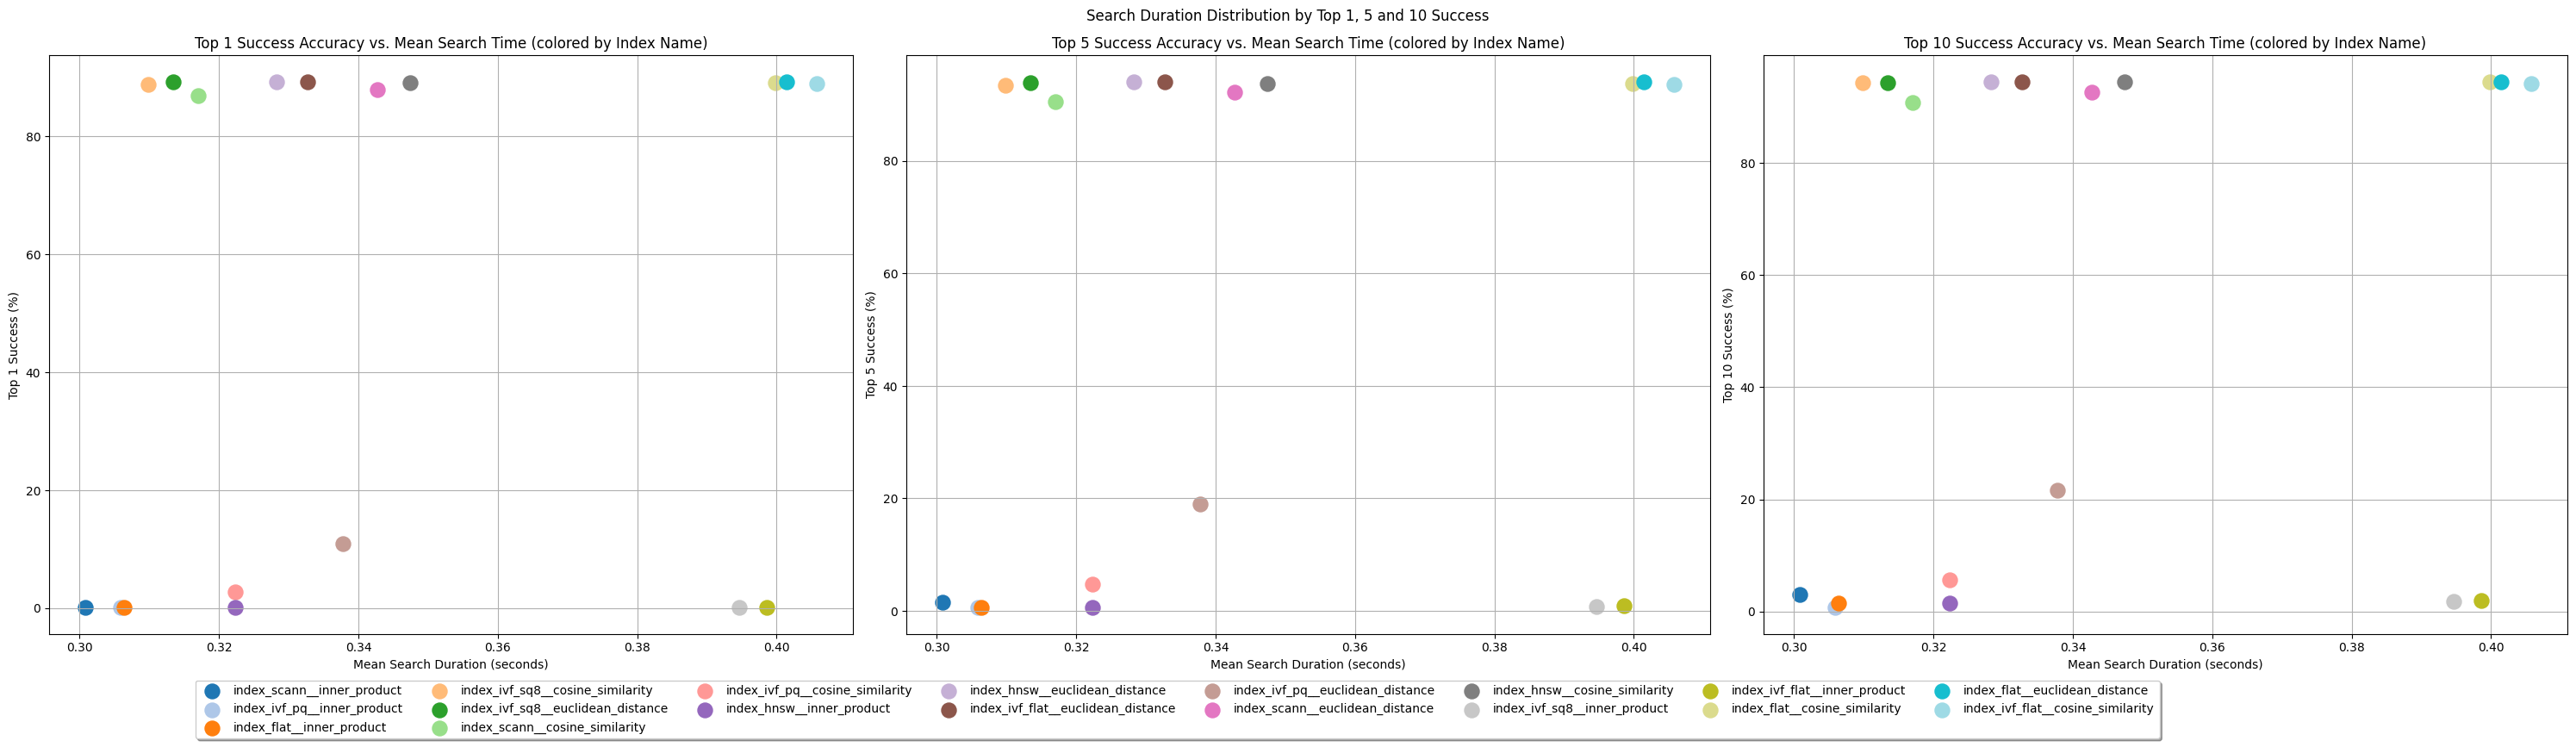

In [31]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = time_analises.sort_values(by=['Mean Search Duration'], ascending=True).reset_index(drop = True)

rows, cols = 1, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 8))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

list_graphs = ['Top 1 Success', 'Top 5 Success', 'Top 10 Success']
for name in list_graphs:
    ax = axes.flat[ax_count]

    mean_duration = df["Mean Search Duration"]
    top1_accuracy = df[name]
    
    # Create the scatter plot
    #ax.figure(figsize=(8, 8))
    for i, row in df.iterrows():
        ax.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])
    
    # Add labels and title
    ax.set_xlabel("Mean Search Duration (seconds)")
    ax.set_ylabel(f"{name} (%)")
    ax.set_title(f"{name} Accuracy vs. Mean Search Time (colored by Index Name)")
    ax.grid(True)
    ax_count += 1


# Adjust layout (optional)
plt.suptitle("Search Duration Distribution by Top 1, 5 and 10 Success")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.07),
              fancybox=True, shadow=True, ncol=8)
    

# Show the final plot
plt.show()

## Analise do top 1, 5 e 10 pelo desvio padrao - Estabilidade da accuraria

In [32]:
time_analises_dsv = result[['Top 1 Success', 'Top 5 Success', 'Top 10 Success', 'Standard Deviation']].reset_index()
time_analises_dsv

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success,Standard Deviation
0,index_hnsw__euclidean_distance,89.3,94.1,94.5,0.094536
1,index_flat__euclidean_distance,89.3,94.1,94.5,0.052050
2,index_ivf_flat__euclidean_distance,89.2,94.0,94.4,0.126363
3,index_ivf_sq8__euclidean_distance,89.2,93.9,94.3,0.108607
4,index_flat__cosine_similarity,89.1,93.8,94.5,0.033127
5,index_hnsw__cosine_similarity,89.1,93.8,94.5,0.084629
6,index_ivf_flat__cosine_similarity,89.0,93.6,94.2,0.046411
7,index_ivf_sq8__cosine_similarity,88.8,93.4,94.3,0.102426
8,index_scann__euclidean_distance,88.0,92.3,92.6,0.091429
9,index_scann__cosine_similarity,87.0,90.6,90.8,0.099965


/tmp/ipykernel_254693/4262824267.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])


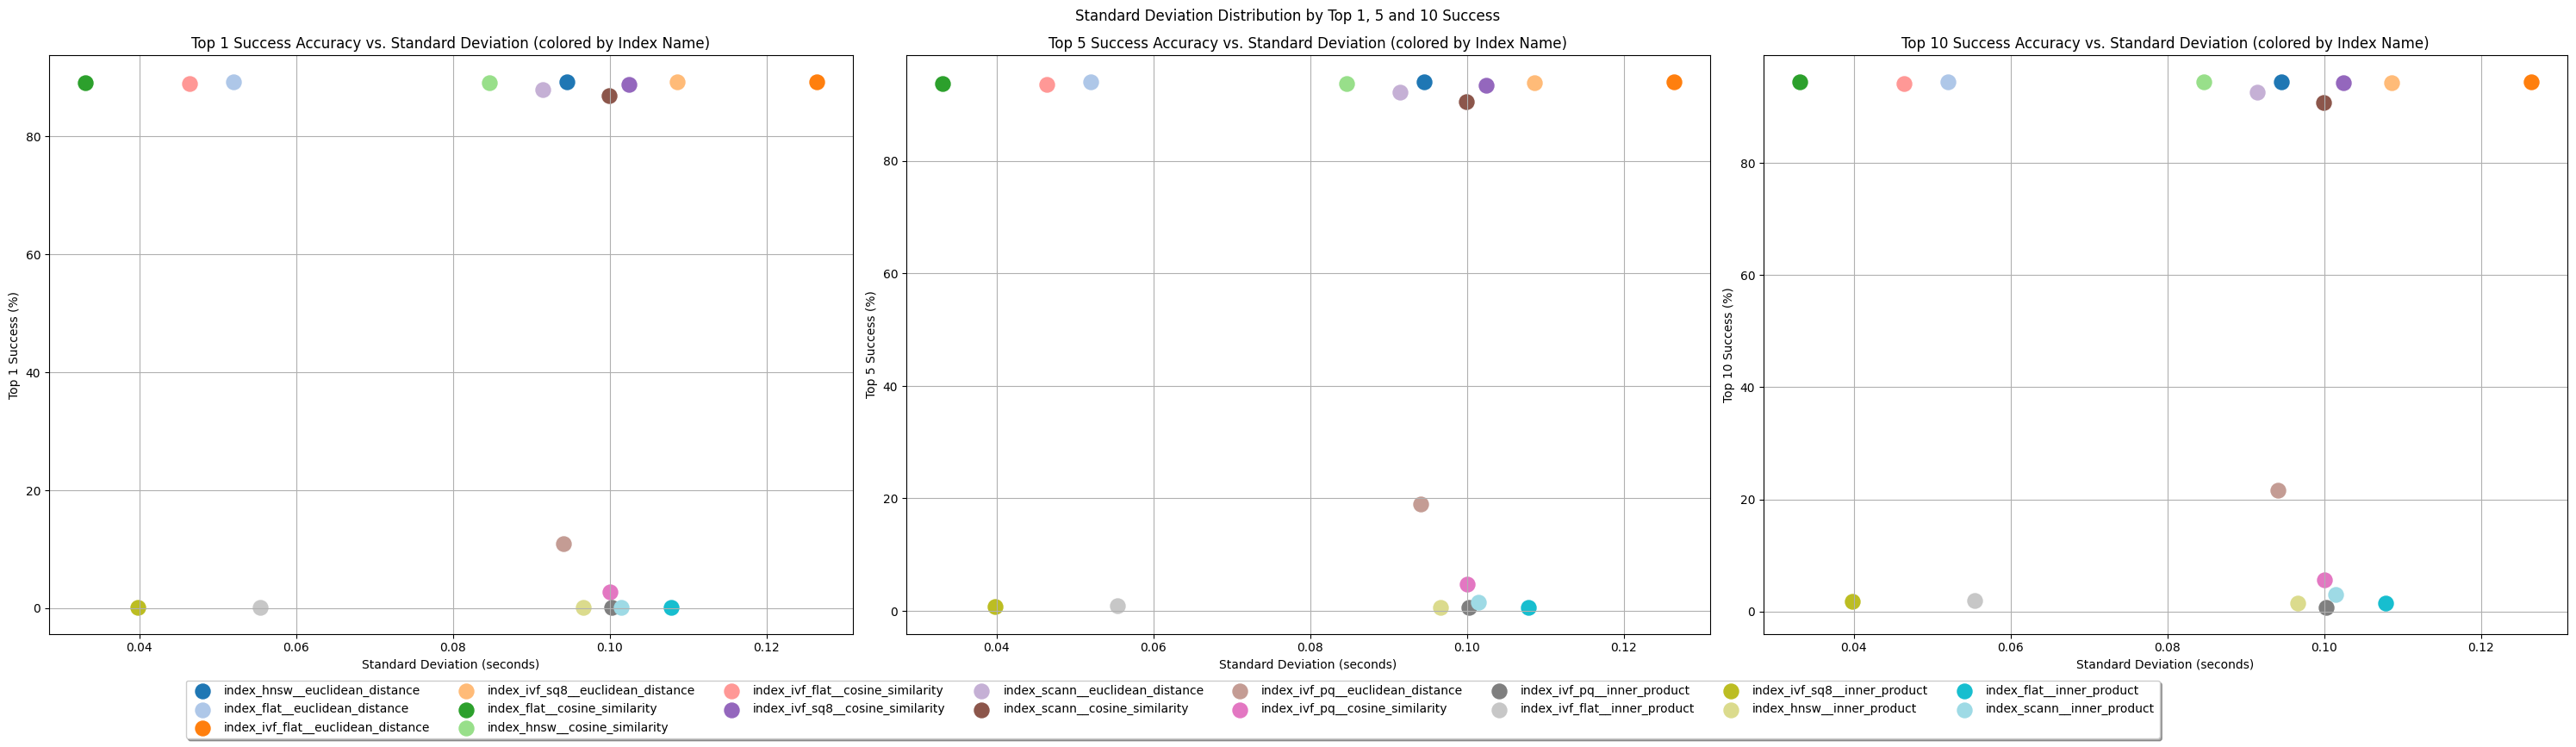

In [33]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = time_analises_dsv.sort_values(by=['Top 1 Success'], ascending=False).reset_index(drop = True)

rows, cols = 1, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 8))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

list_graphs = ['Top 1 Success', 'Top 5 Success', 'Top 10 Success']
for name in list_graphs:
    ax = axes.flat[ax_count]

    mean_duration = df["Standard Deviation"]
    top1_accuracy = df[name]
    
    # Create the scatter plot
    #ax.figure(figsize=(8, 8))
    for i, row in df.iterrows():
        ax.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])
    
    # Add labels and title
    ax.set_xlabel("Standard Deviation (seconds)")
    ax.set_ylabel(f"{name} (%)")
    ax.set_title(f"{name} Accuracy vs. Standard Deviation (colored by Index Name)")
    ax.grid(True)
    ax_count += 1


# Adjust layout (optional)
plt.suptitle("Standard Deviation Distribution by Top 1, 5 and 10 Success")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.07),
              fancybox=True, shadow=True, ncol=8)
    

# Show the final plot
plt.show()

## Analise accuraria top 1, 5 e 10 pela media de tempo x Tempo de build do indicie

In [34]:
result_index = result[['Top 1 Success', 'Top 5 Success', 'Top 10 Success', 
        'Mean Search Duration', 'build_index_duration_s']].reset_index()
column = "build_index_duration_s" 
#result_index["norm_build_index_duration_s"] = (result_index[column] - result_index[column].mean()) / result_index[column].std()  
result_index

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success,Mean Search Duration,build_index_duration_s
0,index_hnsw__euclidean_distance,89.3,94.1,94.5,0.328290,167.572067
1,index_flat__euclidean_distance,89.3,94.1,94.5,0.401441,0.507756
2,index_ivf_flat__euclidean_distance,89.2,94.0,94.4,0.332692,141.940749
3,index_ivf_sq8__euclidean_distance,89.2,93.9,94.3,0.313430,139.954447
4,index_flat__cosine_similarity,89.1,93.8,94.5,0.399849,0.506066
5,index_hnsw__cosine_similarity,89.1,93.8,94.5,0.347422,165.167708
6,index_ivf_flat__cosine_similarity,89.0,93.6,94.2,0.405726,123.272619
7,index_ivf_sq8__cosine_similarity,88.8,93.4,94.3,0.309850,114.553523
8,index_scann__euclidean_distance,88.0,92.3,92.6,0.342716,207.212922
9,index_scann__cosine_similarity,87.0,90.6,90.8,0.316998,284.178970


/tmp/ipykernel_254693/3272321919.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(mean_duration[i], top1_accuracy[i], s=row["build_index_duration_s"] + 50, c=colors[i], label=row["Index Name"])


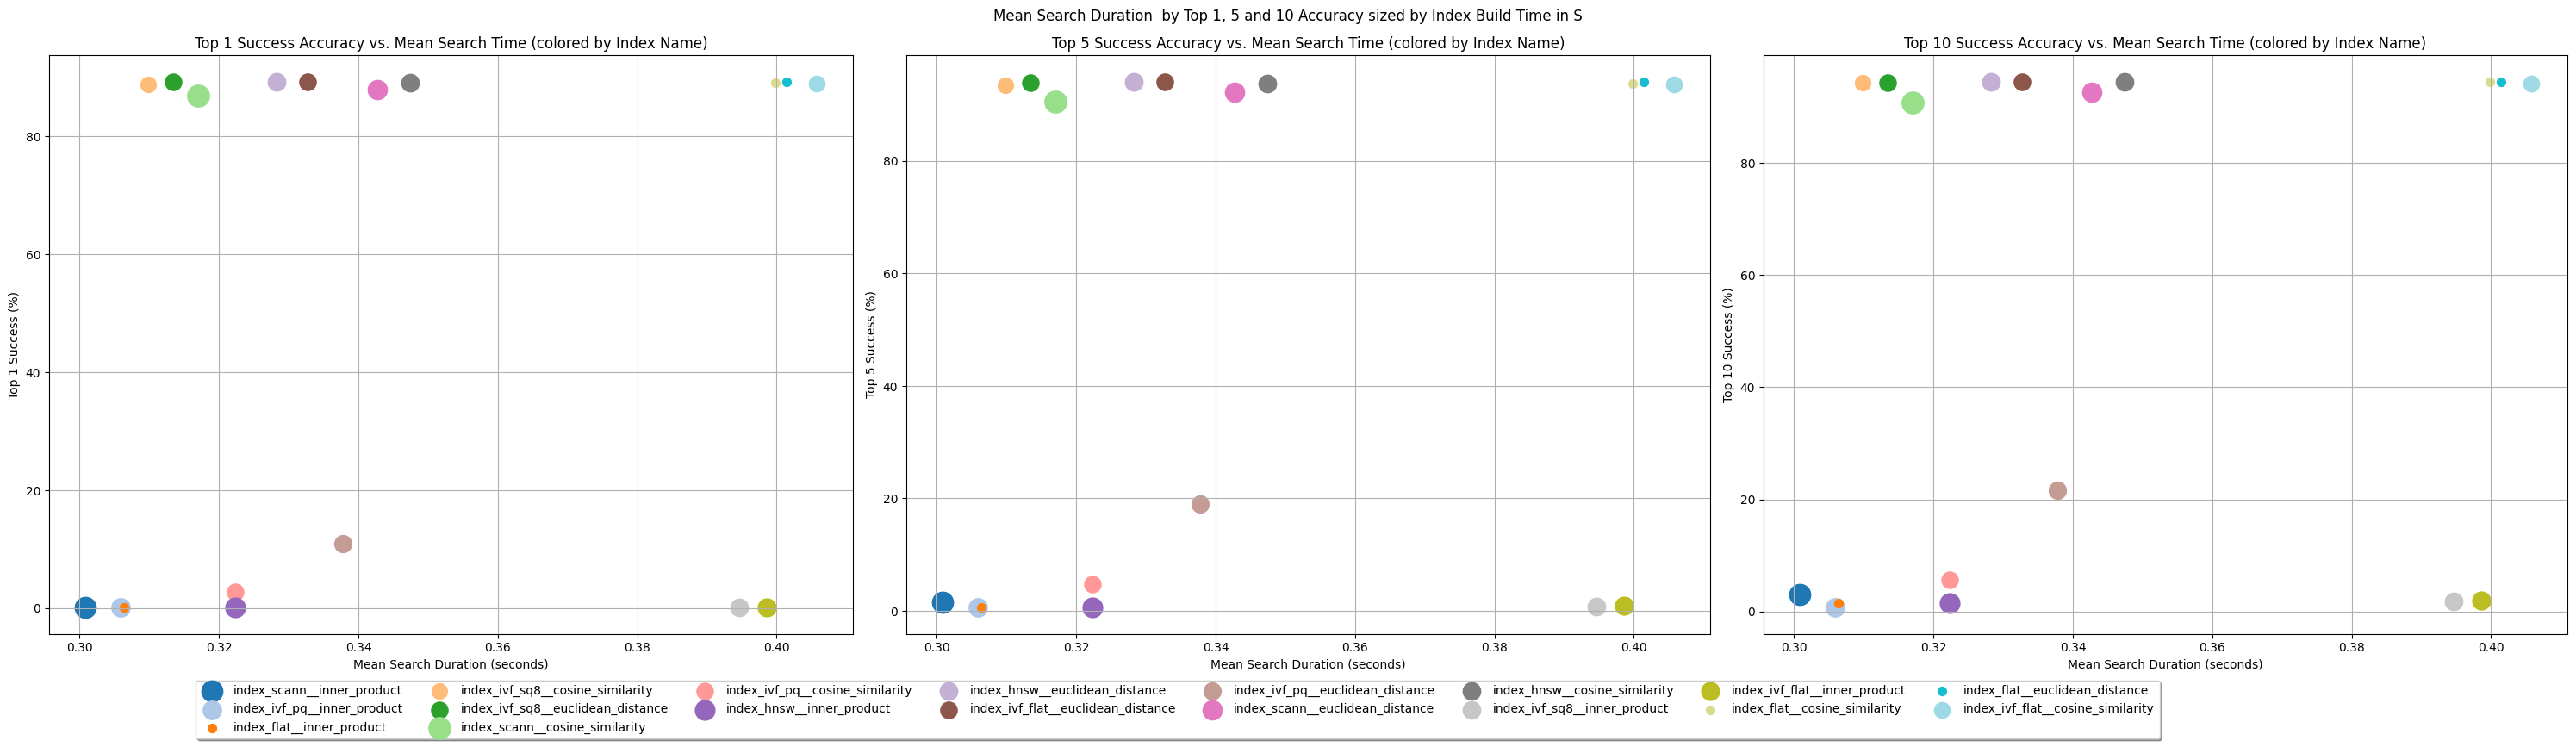

In [36]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = result_index.sort_values(by=['Mean Search Duration'], ascending=True).reset_index(drop = True)

rows, cols = 1, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 8))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

list_graphs = ['Top 1 Success', 'Top 5 Success', 'Top 10 Success']
for name in list_graphs:
    ax = axes.flat[ax_count]

    mean_duration = df["Mean Search Duration"]
    top1_accuracy = df[name]
    
    # Create the scatter plot
    #ax.figure(figsize=(8, 8))
    for i, row in df.iterrows():
        ax.scatter(mean_duration[i], top1_accuracy[i], s=row["build_index_duration_s"] + 50, c=colors[i], label=row["Index Name"])
    
    # Add labels and title
    ax.set_xlabel("Mean Search Duration (seconds)")
    ax.set_ylabel(f"{name} (%)")
    ax.set_title(f"{name} Accuracy vs. Mean Search Time (colored by Index Name)")
    ax.grid(True)
    ax_count += 1


# Adjust layout (optional)
plt.suptitle("Mean Search Duration  by Top 1, 5 and 10 Accuracy sized by Index Build Time in S")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.07),
              fancybox=True, shadow=True, ncol=8, draggable=True)
    

# Show the final plot
plt.show()